# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## GPU Check

In [1]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### Read Sign Names from CSV
Create a Dictionary of map label IDs to their corresponding sign names. This dictionary will later be used in the below cells to plot the model performance

In [4]:
import pandas as pd
signnames = pd.read_csv('signnames.csv')
signnames_dict = {}
    
for index, row in signnames.iterrows():
    signnames_dict[row['ClassId']] = row['SignName'] 

#### Plot Distribution of Labels across Train, Validation and Test sets

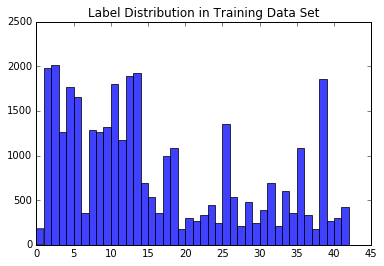

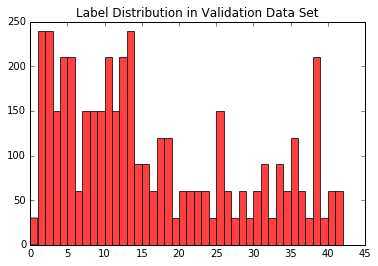

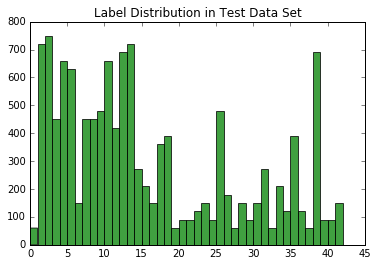

16


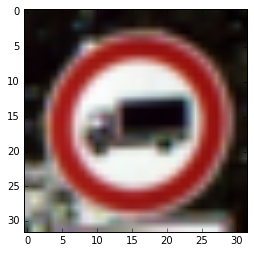

In [36]:
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index]

plt.hist(y_train,bins = range(n_classes), alpha=0.75)
plt.title('Label Distribution in Training Data Set')

plt.show()

plt.hist(y_valid,bins = range(n_classes), alpha=0.75, color ='red')
plt.title('Label Distribution in Validation Data Set')

plt.show()

plt.hist(y_test,bins = range(n_classes), alpha=0.75, color ='green')
plt.title('Label Distribution in Test Data Set')

plt.show()

plt.figure(figsize=(4,4))
plt.imshow(image)
print(y_train[index])


**The Distribution of classes across Train, Test and Validation sets are almost identical. This reflects in the barcharts plotted above.**

#### Print All Different Traffic Signs Images(to get an idea)

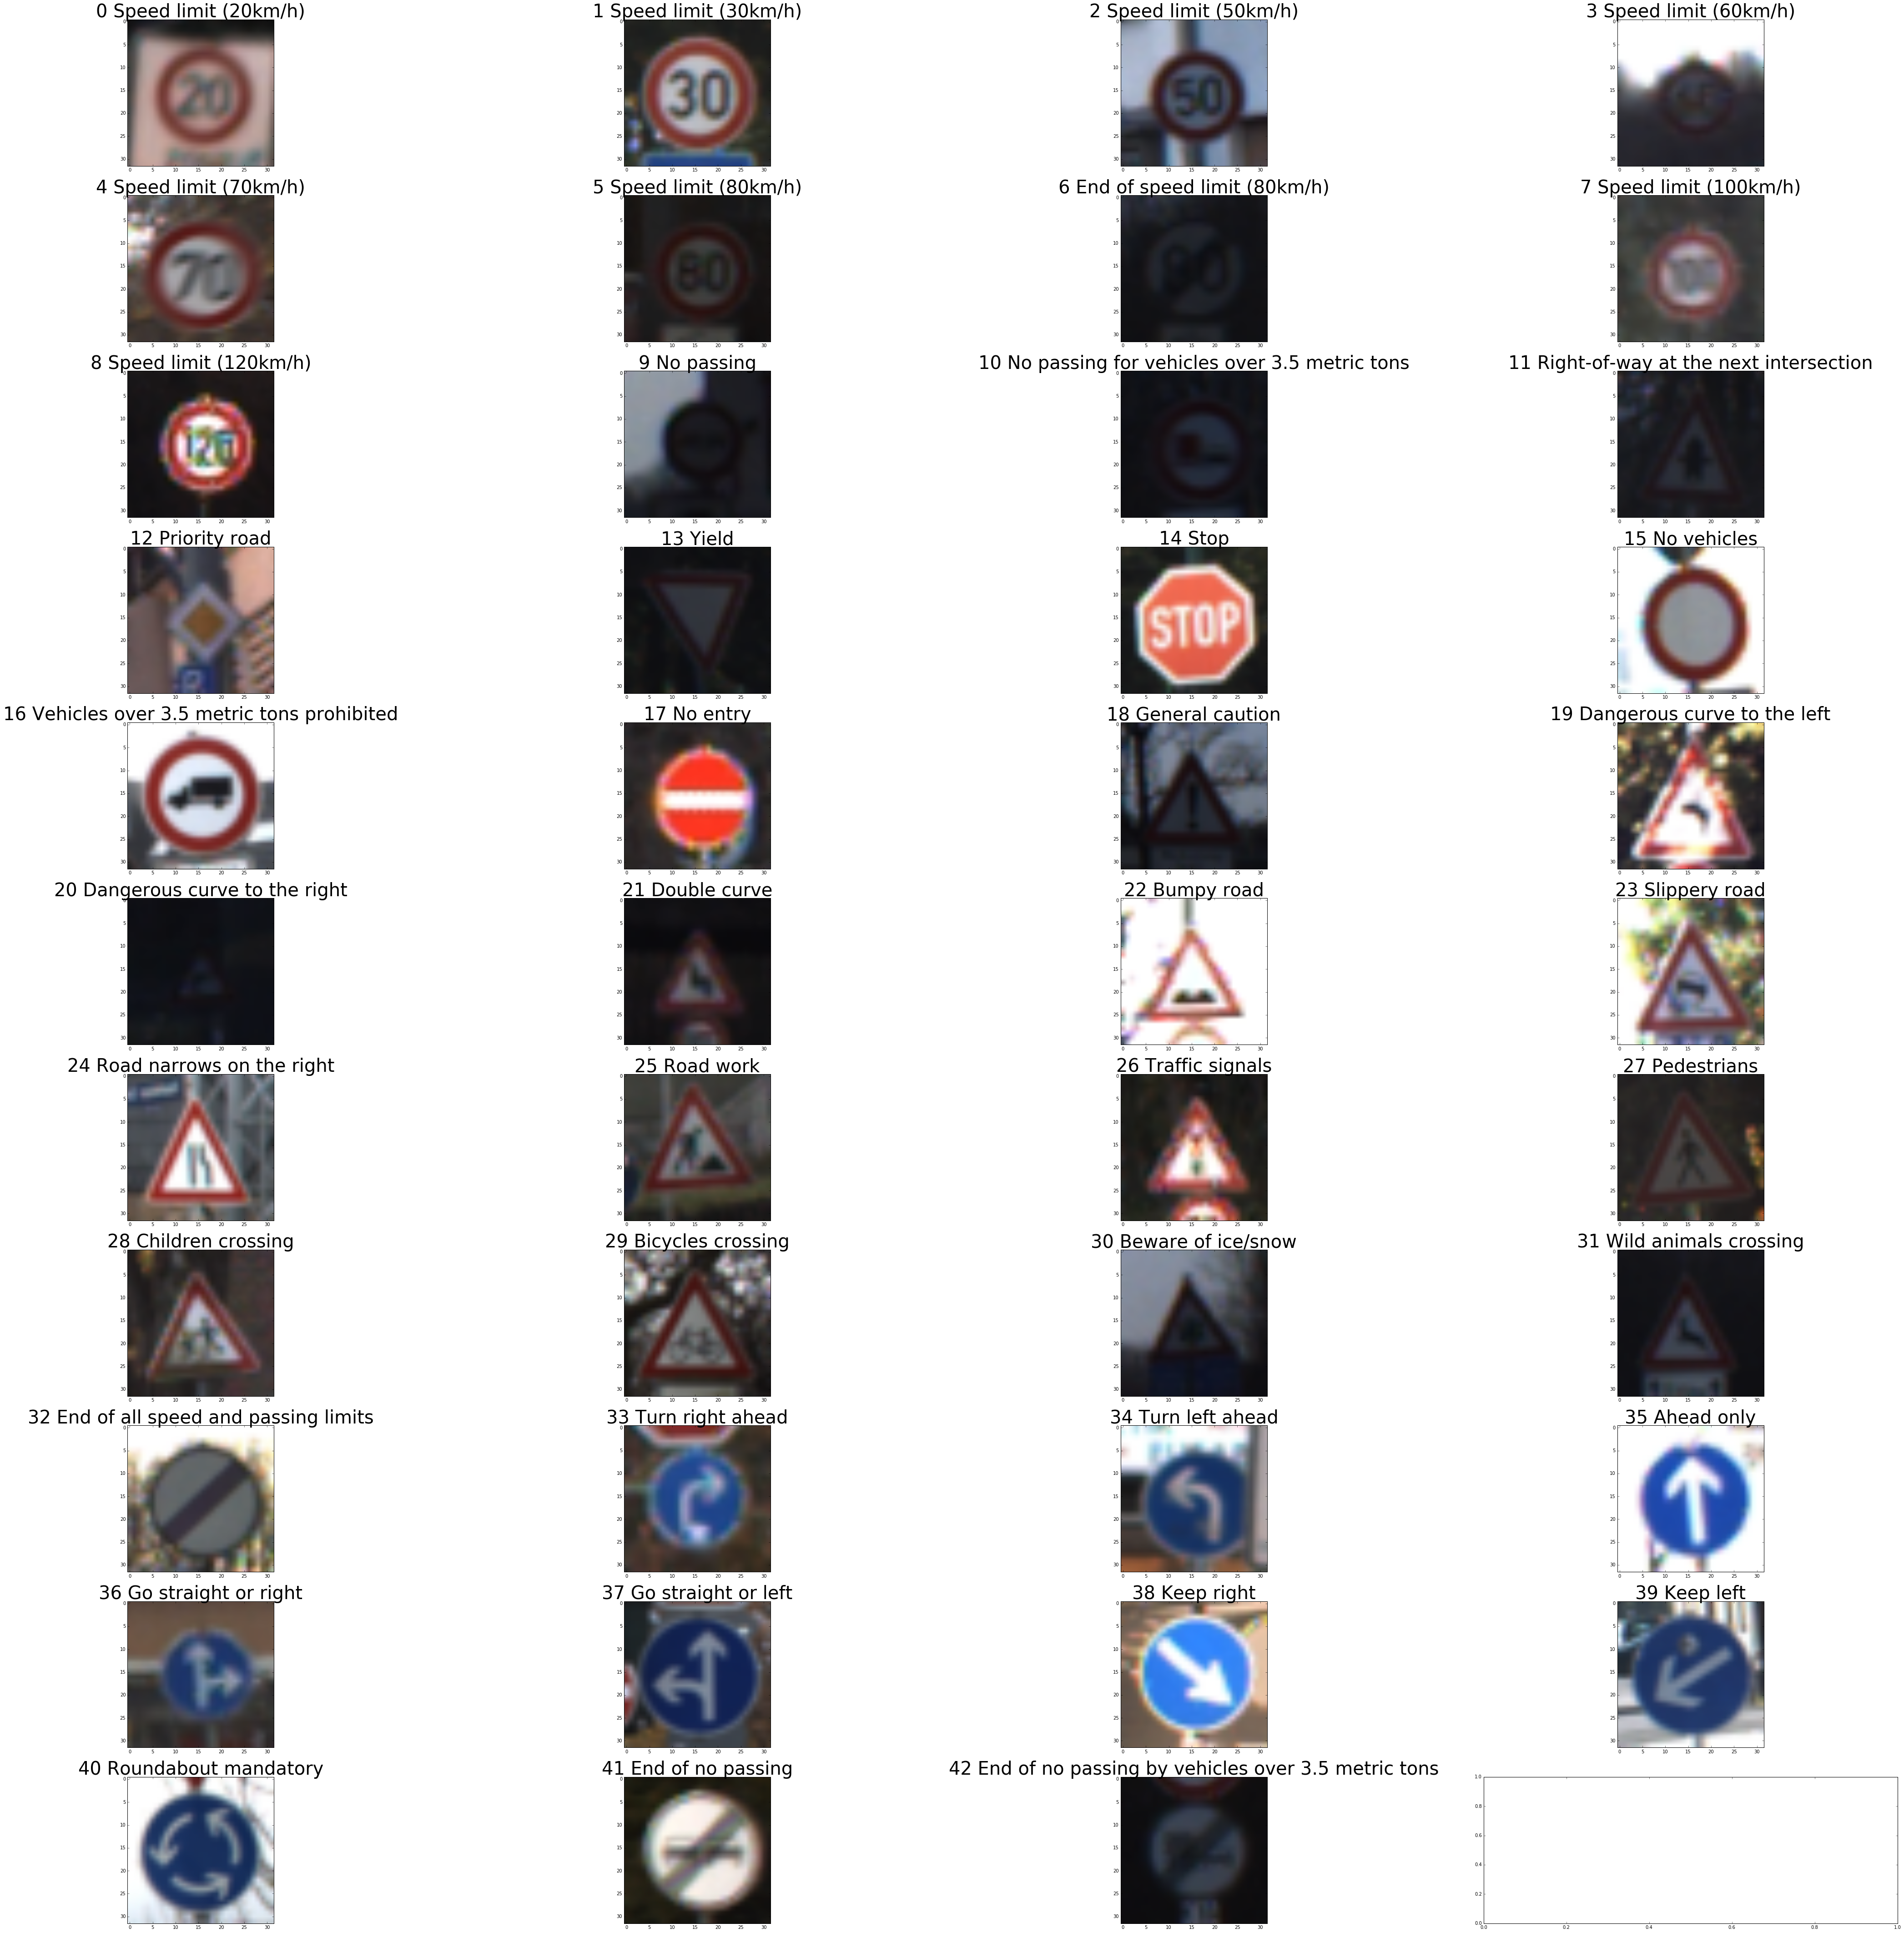

In [6]:
images =[random.choice([idx for idx in range(len(y_train)) if y_train[idx]==i]) for i in np.arange(0,43)]
f, axarr = plt.subplots(11,4, figsize=(75,75))
x_axis = 0
y_axis = 0
for i in range(len(images)):
    if i!=0 and i%4 == 0:
        x_axis += 1
        y_axis = 0
    
    image = X_train[images[i]]
    axarr[x_axis,y_axis].imshow(image)
    axarr[x_axis,y_axis].set_title(str(y_train[images[i]])+' '+signnames_dict[y_train[images[i]]], fontsize=40)        
    y_axis += 1
    f.subplots_adjust(hspace=0.2)
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set 
1. Normalization
2. Batch Normalization between layers
3. Image Augmentation for Training


Image data has been normalized so that the numerical range is between 0 and 1.

In [7]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
print(X_train[1][1][1])
print(X_valid[1][1][1])
print(X_test[1][1][1])


[30 30 28]
[12 12 13]
[94 83 65]


#### Normalize Input Data
Normalize function takes in image data, x, and returns it as a normalized Numpy array. The returned values will be in the range of 0 to 1, inclusive. The return object is the same shape as input image x.

In [8]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    dim_min = x.min(axis=(1,2), keepdims=True)
    dim_max = x.max(axis=(1,2), keepdims=True)
    normalized_array = (x - dim_min)/(dim_max - dim_min)
    return normalized_array

In [9]:
X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

#### Batch Normalization between layers

As the inputs flow through different layers of the network their distribution change affecting the network's performance. This is called Internal-covariate shift problem. Technique called Batch normalization will center the inputs to zero and normalize them, then scale and shift the result using beta and gamma parameters. This is done just before the activation function of every layer. 
In order to zero-center and normalize the inputs, the training needs to calculate the input's mean and standard deviation. It does by evaluating the mean and standard deviation of the inputs for every mini batch. (hence the name batch normalization).

This technique is proven to be very effective. In this case, it gives us a little nudge by improving the accuracy from 93 percent close to ~ 97 percent.
The following code was taken from https://gist.github.com/tomokishii/0ce3bdac1588b5cca9fa5fbdf6e1c412

In [10]:
def batch_norm(x, n_out, axes, phase_train):
    """
    Batch normalization on convolutional maps.
    Ref.: http://stackoverflow.com/questions/33949786/how-could-i-use-batch-normalization-in-tensorflow
    Args:
        x:           Tensor, 4D BHWD input maps
        n_out:       integer, depth of input maps
        phase_train: boolean tf.Varialbe, true indicates training phase
        scope:       string, variable scope
    Return:
        normed:      batch-normalized maps
    """
    with tf.variable_scope('bn'):
        beta = tf.Variable(tf.constant(0.0, shape=[n_out]),
                                     name='beta', trainable=True)
        gamma = tf.Variable(tf.constant(1.0, shape=[n_out]),
                                      name='gamma', trainable=True)
        batch_mean, batch_var = tf.nn.moments(x, axes, name='moments')
        ema = tf.train.ExponentialMovingAverage(decay=0.5)

        def mean_var_with_update():
            ema_apply_op = ema.apply([batch_mean, batch_var])
            with tf.control_dependencies([ema_apply_op]):
                return tf.identity(batch_mean), tf.identity(batch_var)

        mean, var = tf.cond(phase_train,
                            mean_var_with_update,
                            lambda: (ema.average(batch_mean), ema.average(batch_var)))
        normed = tf.nn.batch_normalization(x, mean, var, beta, gamma, 1e-3)
    return normed

#### Image Augmentation
This is a regularization technique to generate new training images from existing ones to boost the size of the training set. This will not only help the model learn better, but will also reduce over-fitting.  
The idea is to slightly shift, rotate/flip, change brightness/contrast every picture in the training set and add them back to the training set.  

This forces the model to be more tolerant to position and orientation of the key pixels in the image.

In [11]:
def image_augmentation(features, labels, sess):
        
    """
    Image augmentationL Flip, Change Brigtness and Contrast
    : features: List of image data.  The image shape is (32, 32, 3)
    : labels : Labels corresponding to images
    : sess: Tensorflow session
    : return: Augmented images and labels
    """
        
    ipt = tf.placeholder(tf.float32, (None, 32, 32, 3))
    output_tensor = tf.map_fn(generate_images, ipt, parallel_iterations=10)
    
    features = np.append(features, sess.run(output_tensor, feed_dict = {ipt: features}),axis = 0)
    labels = np.append(labels, labels, axis = 0)
    return features, labels
  

def generate_images(image):
    image_tensor = np.random.choice([tf.image.random_flip_left_right(image),
                                     tf.image.random_flip_up_down(image)]
                                   )
    image_tensor = tf.image.random_brightness(image_tensor, max_delta=63/255.0)
    image_tensor = tf.image.random_contrast(image_tensor, lower=0.2, upper=1.8)
    return image

### Model Architecture
#### Pipeline
This architecture used LeNet-5, which is perhaps the most widely known CNN architecture. It was originally designed by Yann LeCun in 1998 and was initially used to classify hand written digits.  Below is the design in brief:  

1. Input Image: 32 x 32 x 3 
2. Convolution 1: Kernel size = 5, Feature maps = 6, Strides = 1, Padding = VALID, Output Image: 28 x 28 x 6
3. Maxpool Layer 1: Kernel size = 2, Strides = 2, Padding = SAME, Output Image: 14 x 14 x 6
4. Convolution 2: Kernel size = 5, Feature maps = 16, Strides = 1, Padding = VALID, Output Image: 10 x 10 x 16
5. Maxpool Layer 2: Kernel size = 2, Strides = 2, Padding = SAME , Output Image: 5 x 5 x 16
6. Flatten : Output = 400 neurons
7. Fully Connected Layer 1: Output = 120 neurons
8. Fully Connected Layer 2: Output = 84 neurons
9. Output Fully Connected Layer: Output = 43 neurons (no of labels)

Convolution 1, Convolution 2, Fully Connected Layer 1 and Fully Connected Layer 2 use batch normalizaton with relu activation function.

#### Drop out Regularization:
Drop out regularization was used on Fully Connected Layer 1 and Fully Connected Layer 2.

#### Hyper Parameters:
1. The number of epochs used: 10
2. Learning Rate:  0.01. Batch normalization has an advantage which will enable us to specify a higher learning rate without compromising on accuracy.
3. Batch size : 128
4. Drop out regularization probability: 0.6


In [12]:
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob, is_training):   
    
    """
    Image augmentationL Flip, Change Brigtness and Contrast
    : x: Input tensor of shape (None, 32, 32, 3)
    : keep_prob : Probability for drop out regularization
    : is_training: True/False to the phase of the model. Used for batch normalization. 
                   This value is passed as False during validation and testing phase
    : return: Augmented images and labels
    """
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    def get_weights_bias(w_shape, b_shape):
        weights = tf.Variable(tf.truncated_normal(w_shape, mean =mu, stddev = sigma ))
        bias = tf.Variable(tf.truncated_normal(b_shape, mean =mu, stddev = sigma ))
        return weights, bias      
    
    
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    
    with tf.variable_scope('conv_layer1-batch_norm'):
        weights, bias = get_weights_bias([5,5,3,6], [6])    
        conv_layer1 = tf.nn.conv2d(input = x, filter = weights, strides = [1,1,1,1], padding = 'VALID')
        conv_activations1 = conv_layer1  #Return this to View Feature map activations later
        conv_layer1 = tf.nn.bias_add(conv_layer1, bias) 
        conv_layer1 = batch_norm(x = conv_layer1, n_out = 6, axes = [0,1,2], phase_train = is_training)
        conv_layer1 = tf.nn.relu(conv_layer1)
    
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
        conv_maxpool1 = tf.nn.max_pool(value = conv_layer1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME' )
       
    
    # Layer 2: Convolutional. Output = 10x10x16.
    with tf.variable_scope('conv_layer1-batch_norm'):
        weights, bias = get_weights_bias([5,5,6,16], [16])   
        conv_layer2 = tf.nn.conv2d(input = conv_maxpool1, filter = weights, strides = [1,1,1,1], padding = 'VALID')
        conv_activations2 = conv_layer2 #Return this to View Feature map activations later
        conv_layer2 = tf.nn.bias_add(conv_layer2, bias)   
        conv_layer2 = batch_norm(x = conv_layer2, n_out = 16, axes = [0,1,2], phase_train = is_training)
        conv_layer2 = tf.nn.relu(conv_layer2)
    
        # Pooling. Input = 10x10x16. Output = 5x5x16.
        conv_maxpool2 = tf.nn.max_pool(value = conv_layer2,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME' )
    
    # Flatten. Input = 5x5x16. Output = 400.
        shape = conv_maxpool2.get_shape().as_list()
        num_nodes = np.prod(shape[1:])
        flatten = tf.reshape(conv_maxpool2,[-1,num_nodes])
    
    
          
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    with tf.variable_scope('fc1-batch_norm'):
        weights, bias = get_weights_bias([num_nodes, 120], [120])       
        fc1 = tf.add(tf.matmul(flatten,weights),bias)
        fc1 = batch_norm(x = fc1, n_out = 120, axes = [0], phase_train = is_training)
        fc1 = tf.nn.relu(fc1)
        fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    
    with tf.variable_scope('fc2-batch_norm'):
        weights, bias = get_weights_bias([120, 84], [84])       
        fc2 = tf.add(tf.matmul(fc1,weights),bias)    
        fc2 = batch_norm(x = fc2, n_out = 84, axes = [0], phase_train = is_training)
        fc2 = tf.nn.relu(fc2)
        fc2 = tf.nn.dropout(fc2, keep_prob)
    

    # Layer 5: Fully Connected. Input = 84. Output = 43.
        weights, bias = get_weights_bias([84, n_classes], [n_classes])         
        logits = tf.add(tf.matmul(fc2,weights),bias)
      
    
    return logits, [conv_activations1,conv_activations1]

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Set Hyper Parameters

In [13]:
epochs = 15
learning_rate = 0.01
batch_size = 128
keep_probability = 0.6

### Define Tensorflow Placeholders

In [14]:
import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name ='x')
y = tf.placeholder(tf.int32, (None), name ='y')
is_training = tf.placeholder(tf.bool, shape =(), name = 'is_training')
keep_prob = tf.placeholder(tf.float32, name = 'keep_prob')
one_hot_y = tf.one_hot(y, 43)



### Compute Training Parameters

In [15]:
logits, tf_activations = LeNet(x, keep_prob, is_training)
logits = tf.identity(logits, name='logits')
# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y), name = 'cost')
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

### Train the Model
Image augmentation is used to generate batch features and labels

In [16]:
def evaluate(X_data, y_data):
    valid_cost = 0    
    valid_accuracy = 0
    batch_cnt = 0
    sess = tf.get_default_session()
    for i in range(0, len(X_data), batch_size):
        batch_x, batch_y = X_data[i:i+batch_size], y_data[i:i+batch_size]
        cost_local,acc = sess.run([cost,accuracy], feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, is_training: False})
        valid_cost += cost_local
        valid_accuracy += acc
        batch_cnt += 1
    return valid_cost / batch_cnt, valid_accuracy / batch_cnt


print('Training...')
saver = tf.train.Saver()
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        epoch_cost = 0
        epoch_accuracy = 0
        X_train, y_train = shuffle(X_train, y_train)   
        batch_cnt = 0
        for i in range(0, len(X_train), batch_size):
            end_index = i + batch_size
            batch_features, batch_labels = X_train[i:end_index], y_train[i:end_index]   
            
            
            # Image Augmentation
            batch_features, batch_labels = image_augmentation(batch_features, batch_labels, sess)           
            
            
            cost_local, acc, _ = sess.run([cost,accuracy, optimizer], 
                                          feed_dict = {x : batch_features, y : batch_labels, 
                                                       keep_prob: keep_probability, is_training : True})
            
            epoch_cost += cost_local
            epoch_accuracy += acc
            batch_cnt += 1
            
            
        
        training_loss = epoch_cost/batch_cnt
        training_accuracy = epoch_accuracy/batch_cnt
        print('Epoch {:>2} '.format(epoch + 1), end='')
        print('Training Loss: {:.6f} Training Accuracy: {:.6f} '.format(training_loss,training_accuracy), end='')
        validation_cost, validation_accuracy = evaluate(X_valid, y_valid)
        print('Validation Loss: {:.6f} Validation Accuracy: {:.6f}'.format(validation_cost,validation_accuracy))
        
        
        
    saver.save(sess, './TrafficSignClassifier')
    print("Model saved")  
    
            

Training...
Epoch  1 Training Loss: 0.891156 Training Accuracy: 0.740833 Validation Loss: 0.208785 Validation Accuracy: 0.944150
Epoch  2 Training Loss: 0.277564 Training Accuracy: 0.915037 Validation Loss: 0.200101 Validation Accuracy: 0.942272
Epoch  3 Training Loss: 0.209669 Training Accuracy: 0.935045 Validation Loss: 0.131291 Validation Accuracy: 0.962277
Epoch  4 Training Loss: 0.163827 Training Accuracy: 0.949846 Validation Loss: 0.112138 Validation Accuracy: 0.969866
Epoch  5 Training Loss: 0.134915 Training Accuracy: 0.958808 Validation Loss: 0.143210 Validation Accuracy: 0.956027
Epoch  6 Training Loss: 0.129956 Training Accuracy: 0.960743 Validation Loss: 0.140249 Validation Accuracy: 0.961607
Epoch  7 Training Loss: 0.116726 Training Accuracy: 0.963706 Validation Loss: 0.128825 Validation Accuracy: 0.965309
Epoch  8 Training Loss: 0.109064 Training Accuracy: 0.967058 Validation Loss: 0.132111 Validation Accuracy: 0.962723
Epoch  9 Training Loss: 0.098206 Training Accuracy: 

### Test the Model on Test Set

In [18]:
tf.reset_default_graph()
save_model_path = './TrafficSignClassifier'
loaded_graph = tf.Graph()

with tf.Session(graph=loaded_graph) as sess:
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)
    
    #Get Saved Tensors
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    loaded_y = loaded_graph.get_tensor_by_name('y:0')
    loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')    
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    loaded_is_training = loaded_graph.get_tensor_by_name('is_training:0')
   
       
    cnt = 0
    test_accuracy = 0
    for i in range(0, len(X_test), batch_size):
        batch_x, batch_y = X_test[i:i+batch_size], y_test[i:i+batch_size]
        test_accuracy += sess.run(loaded_acc, feed_dict={loaded_x: batch_x, loaded_y: batch_y, 
                                                         loaded_keep_prob: 1.0,
                                                         loaded_is_training: False})
        cnt += 1
    
    print('Testing Accuracy: {}\n'.format(test_accuracy/cnt))
    

Testing Accuracy: 0.9452757955801607



---

## Step 3: Test a Model on New Images


18 German traffic sign images were downloaded from the web. These images give more insight into how the model is working.
The model was able to classify images correctly ~89% of the time. The errors were due to Position and orientation of the key pixels in the images.  
Accuracy can be improved by additional data augmentation adding different orientations of the images to the data set. This will help the model adjust to different positions/angles of the pixels in the image leading to a better learning and higher accuracies.

### Load and Output the Images

#### Load Images from Disk (copied from web)

In [23]:
from PIL import Image
from scipy import misc
import os
import glob

my_test_images = []
for filename in glob.glob('myimages/*.jpg'):
    im=Image.open(filename)
    im = misc.imresize(im, (32, 32, 3))
    my_test_images.append(im)
my_test_images = np.array(my_test_images)


#### Load image labels

In [24]:
import re
labels =glob.glob('myimages/*.jpg')
my_test_labels = np.array([int(s) for label in labels for s in re.findall(r'\b\d+\b', label)])
my_test_labels

array([ 1, 11, 13, 14, 17, 18,  2, 22, 25,  3, 30, 31, 33, 34, 36,  4, 40,
        9])

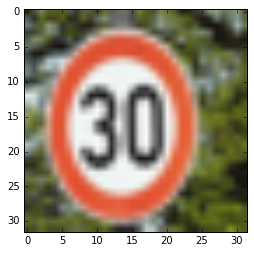

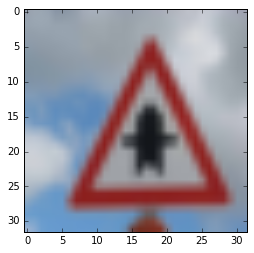

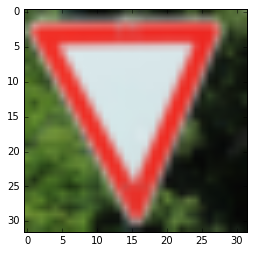

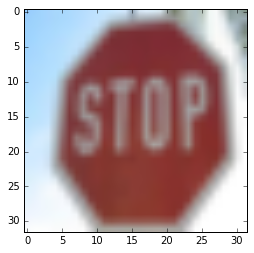

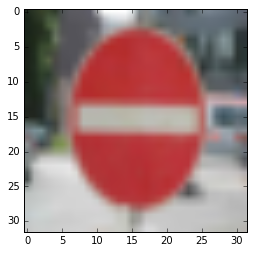

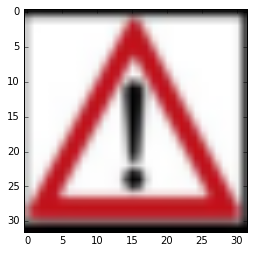

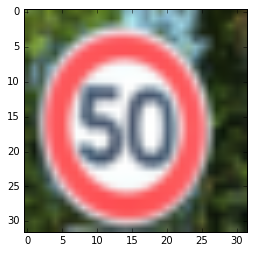

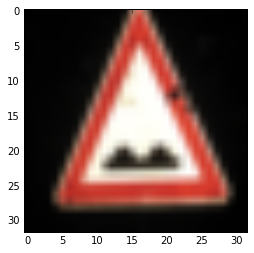

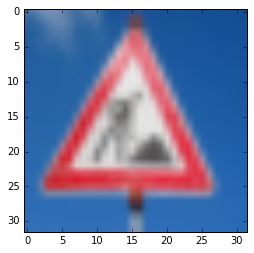

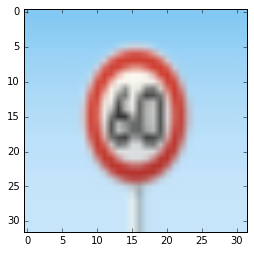

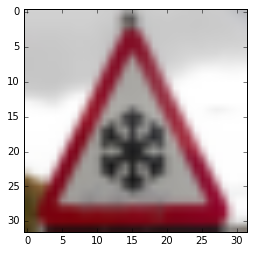

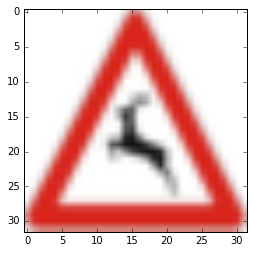

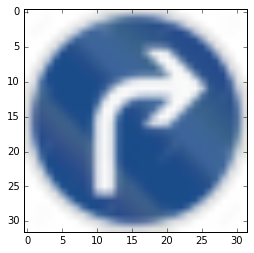

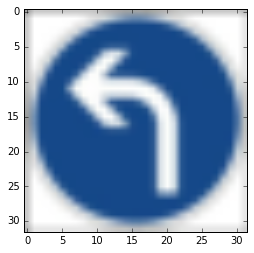

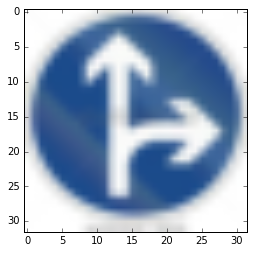

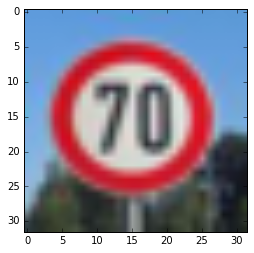

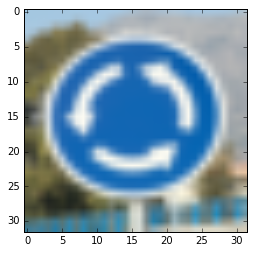

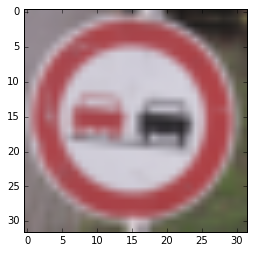

In [25]:
for image in my_test_images:
    plt.imshow(image)
    plt.show()

#### Normalize Images

In [26]:
my_test_images_norm = normalize(my_test_images)

### Function to Display Test Predictions

In [27]:
def display_predictions(features, labels, predictions,top_n_predictions):
            
    fig, axis = plt.subplots(nrows=18, ncols=2, figsize=(20,20))
    fig.tight_layout()
    fig.suptitle('Traffic Sign Predictions', fontsize=20, y=1.1)

    
    margin = 0.05
    ind = np.arange(top_n_predictions)
    width = (1. - 0.5 * margin) / top_n_predictions
    
    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, labels, predictions.indices, predictions.values)):
        
        #plt.imshow(feature)
        #plt.show()
        predicted_signs = [signnames_dict[pred_i] for pred_i in pred_indicies]
        actual_sign = signnames_dict[label_id]

        axis[image_i][0].imshow(feature)
        axis[image_i][0].set_title(actual_sign)
        axis[image_i][0].set_axis_off()

        axis[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axis[image_i][1].set_yticks(ind + margin)
        axis[image_i][1].set_yticklabels(predicted_signs[::-1])
        axis[image_i][1].set_xticks([0, 0.5, 1.0])
        
        fig.subplots_adjust(hspace=0.5)


### Analyze performance

In [28]:
tf.reset_default_graph()
save_model_path = './TrafficSignClassifier'
loaded_graph = tf.Graph()
top_n_predictions = 5

with tf.Session(graph=loaded_graph) as sess:
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)
    
    #Get Saved Tensors
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    loaded_y = loaded_graph.get_tensor_by_name('y:0')
    loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')    
    loaded_is_training = loaded_graph.get_tensor_by_name('is_training:0')
    loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
    loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
   
       
    cnt = 0
    test_accuracy = 0
    predict_probs, accuracy = sess.run([tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),loaded_acc], 
                                       feed_dict={loaded_x: my_test_images_norm, 
                                                  loaded_y: my_test_labels, 
                                                  loaded_keep_prob: 1.0,
                                                  loaded_is_training: False})
    
    
    print('Accuracy: {}\n'.format(accuracy)) 
    
    
   

Accuracy: 0.888888955116272



### Predict the Sign Type for Each Image

In [29]:
predicted_signs =[signnames_dict[idx] for idx in[values[0] for values in predict_probs.indices]]
actual_signs = [signnames_dict[idx] for idx in my_test_labels]  

classified = []
for i in range(len(predicted_signs)):
    if predicted_signs[i] == actual_signs[i]:
        classified.append('Correctly Classified')
    else:
        classified.append('InCorrectly Classified')


import texttable as tt
tab = tt.Texttable()
headings = ['Actual_Sign','Predicted_Sign', 'Classified']
tab.header(headings)

for row in zip(actual_signs,predicted_signs, classified):
    tab.add_row(row)

s = tab.draw()
print (s)

+--------------------------+--------------------------+------------------------+
|       Actual_Sign        |      Predicted_Sign      |       Classified       |
+==========================+==========================+========================+
| Speed limit (30km/h)     | Speed limit (30km/h)     | Correctly Classified   |
+--------------------------+--------------------------+------------------------+
| Right-of-way at the next | Right-of-way at the next | Correctly Classified   |
| intersection             | intersection             |                        |
+--------------------------+--------------------------+------------------------+
| Yield                    | Yield                    | Correctly Classified   |
+--------------------------+--------------------------+------------------------+
| Stop                     | Stop                     | Correctly Classified   |
+--------------------------+--------------------------+------------------------+
| No entry                 |

Out of 18 images, 2 images were incorrectly classified.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

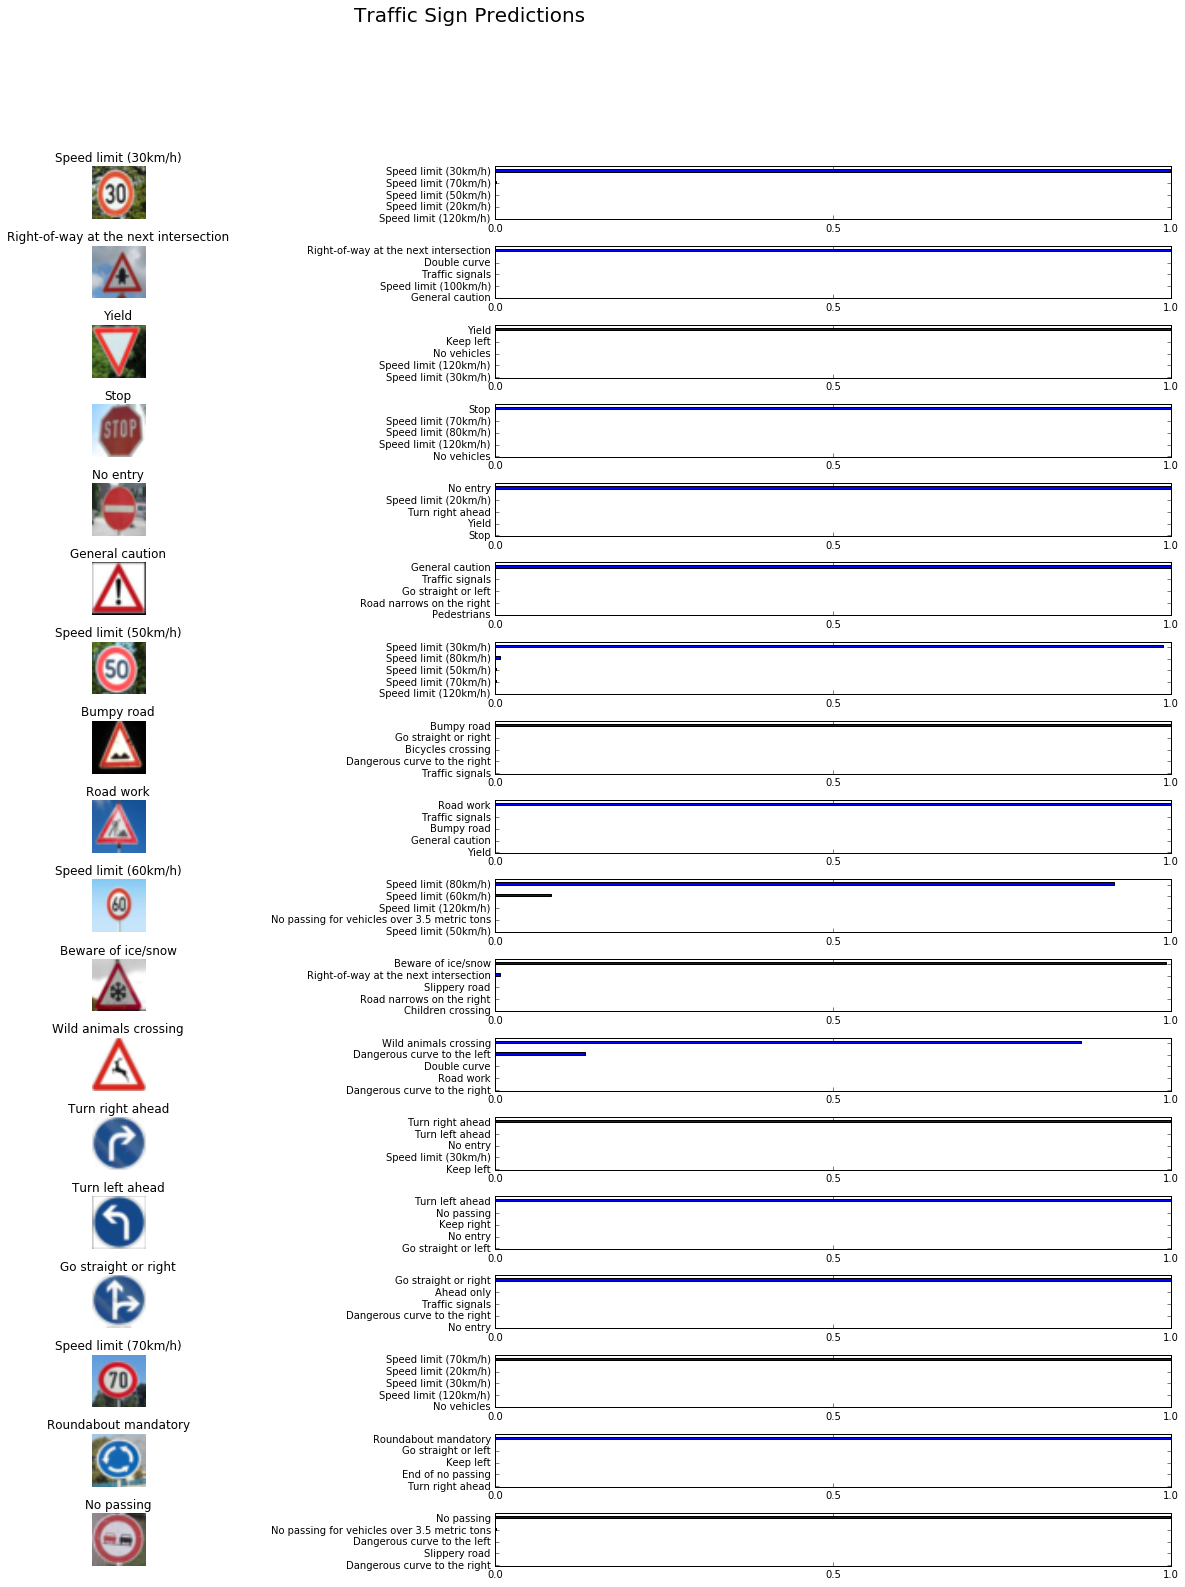

In [30]:
display_predictions(my_test_images, my_test_labels, predict_probs, top_n_predictions)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [33]:
#image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated 
# state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, 
# by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, 
# just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, sess_ip, feed_x, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess_ip,feed_dict={feed_x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

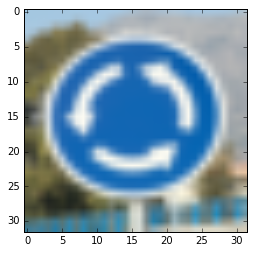

In [34]:
image_input = random.choice(my_test_images)
plt.imshow(image_input)
image_input = normalize(image_input) 

### Neural Network's State at Hidden Layer 1

In [ ]:
tf.reset_default_graph()
save_model_path = './TrafficSignClassifier'
loaded_graph = tf.Graph()
top_n_predictions = 5

with tf.Session(graph=loaded_graph) as sess:
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)
    
    #Get Saved Tensors
    loaded_x = loaded_graph.get_tensor_by_name('x:0')
    outputFeatureMap(image_input, tf_activations[0], sess, loaded_x)